In [1]:
import torch
import torchvision
from torch.autograd import Variable

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
is_ipython = "inline" in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [3]:
def draw(x, y):
    plt.figure()
    plt.plot(x, y)
#     plt.pause(0.1)
    
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [4]:
try:
    import baseline_model
    import self_defined_dataset
except:
    !jupyter nbconvert --to script baseline_model.ipynb
    !jupyter nbconvert --to script self_defined_dataset.ipynb
finally:
    import baseline_model
    import self_defined_dataset

In [5]:
if torch.cuda.is_available():
    CUDA_USAGE = True
else:
    CUDA_USAGE = False

In [6]:
transform_train_list = [
    torchvision.transforms.Resize((256, 256), interpolation=3),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]
data_transform = torchvision.transforms.Compose(transform_train_list)

In [7]:
transform_val_list = [
    torchvision.transforms.Resize((256, 256), interpolation=3),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]

In [8]:
img_root_path = "/home/extension/kaggle/APTOS_2019_Blindness_Detection/train_images"
img_csv = "/home/extension/kaggle/APTOS_2019_Blindness_Detection/train.csv"

In [9]:
train_dataset = self_defined_dataset.Blindness(img_root_path, img_csv, True, data_transform)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

In [10]:
model = baseline_model.Blindness(5)
if CUDA_USAGE:
    model = model.cuda()
else:
    pass

In [11]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [20, 30, 40], gamma=0.1)

In [12]:
EPOCH = 50
ITERATION = 0
ITERATION_LIST = []
LOSS_LIST = []

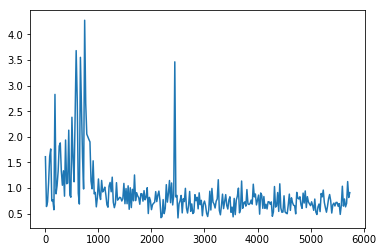

the iteration # is 5740, the loss is 0.9097787


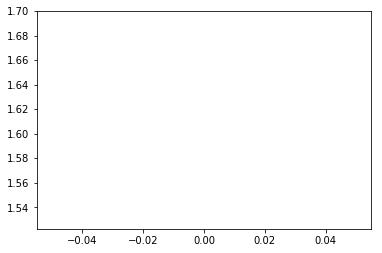

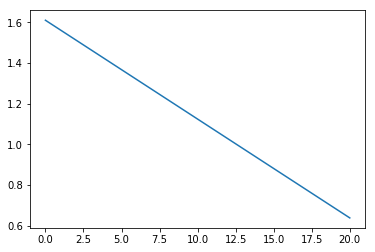

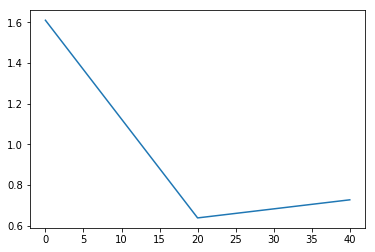

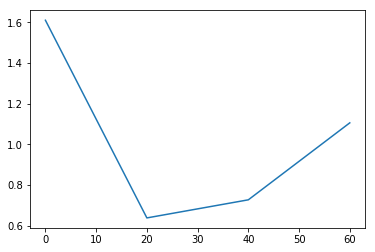

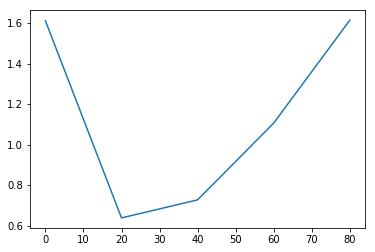

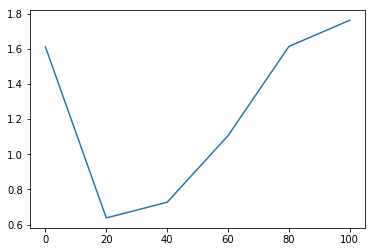

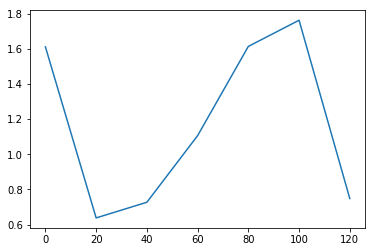

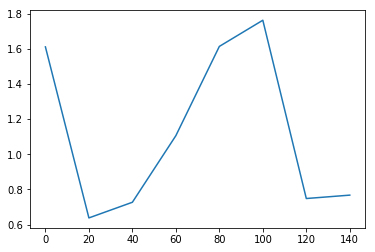

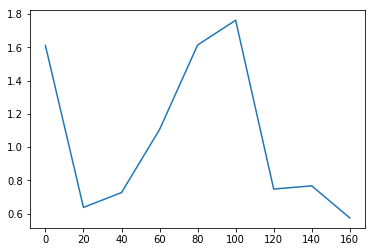

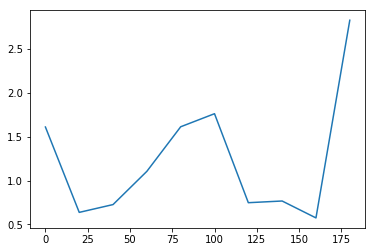

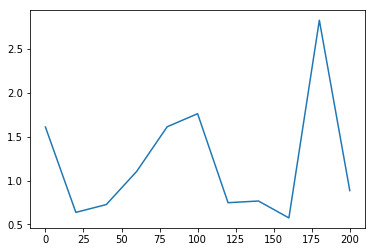

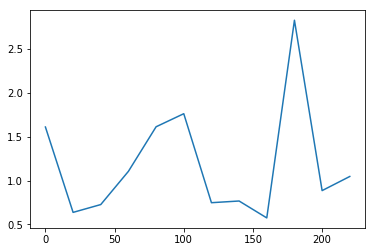

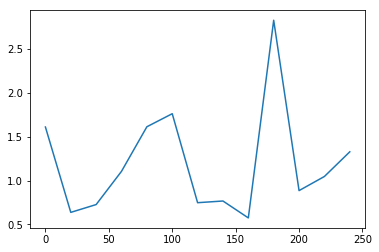

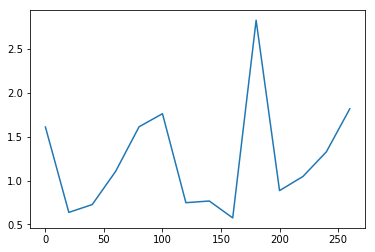

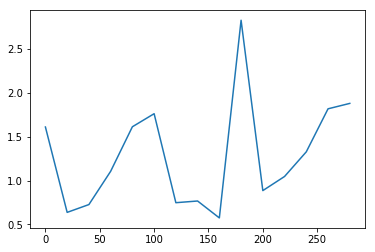

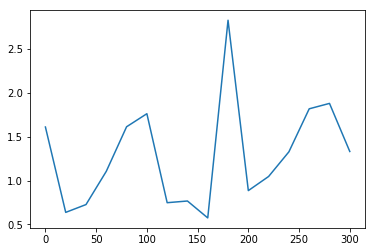

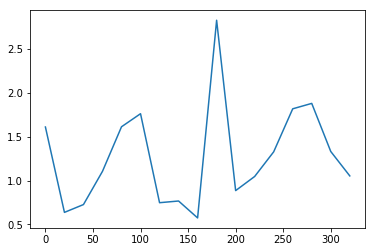

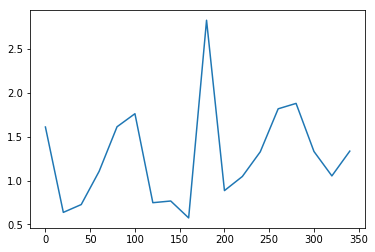

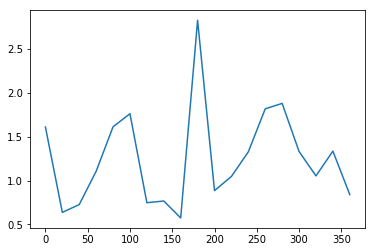

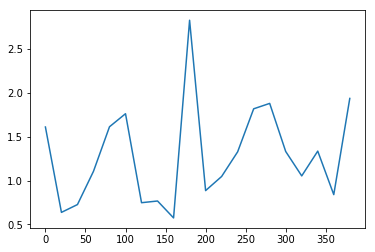

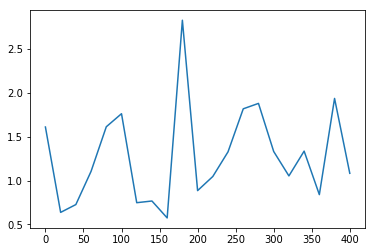

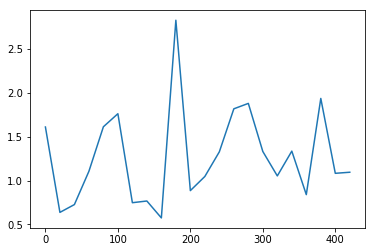

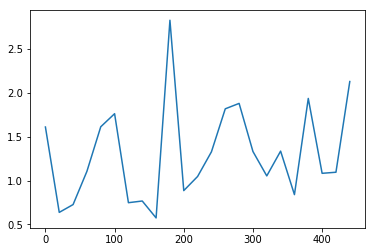

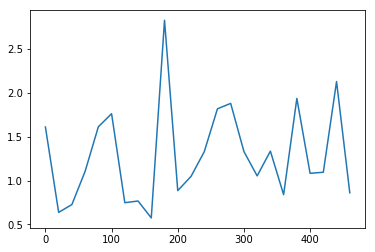

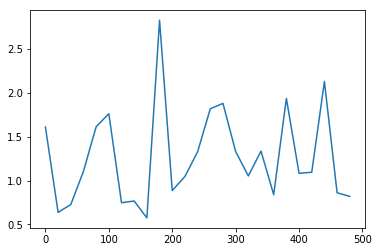

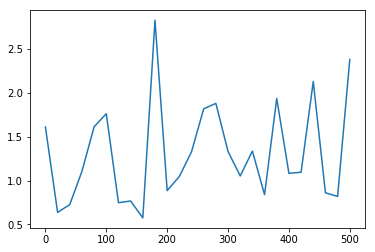

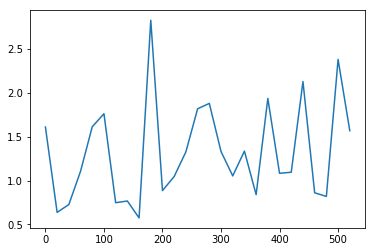

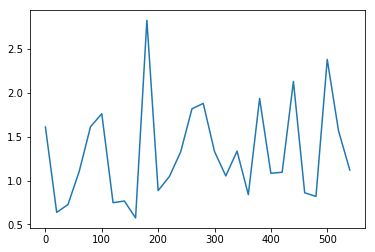

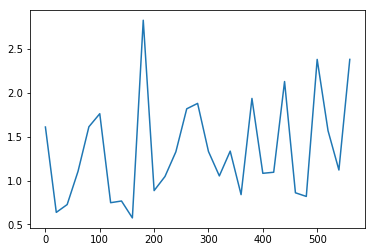

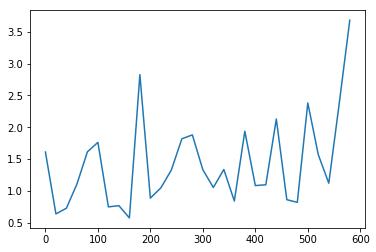

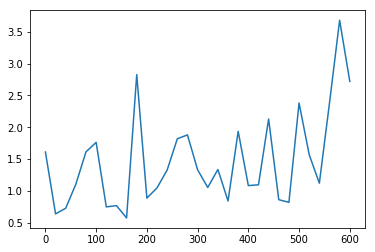

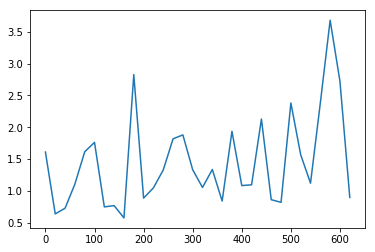

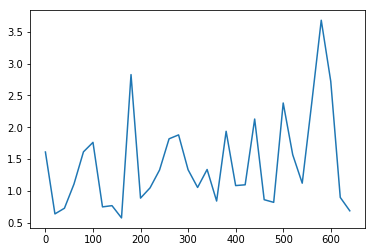

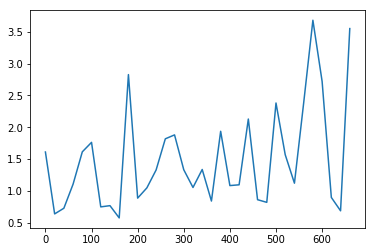

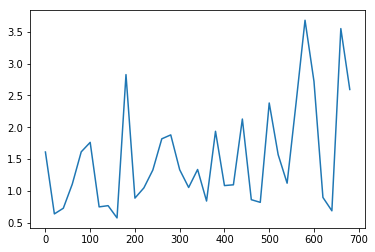

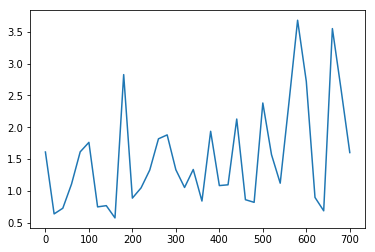

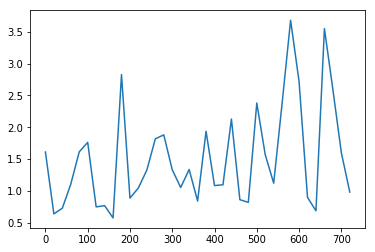

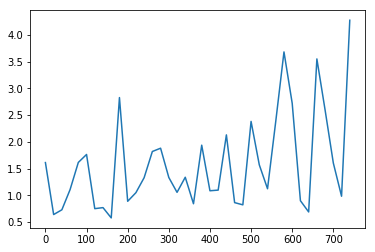

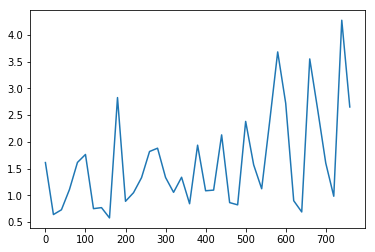

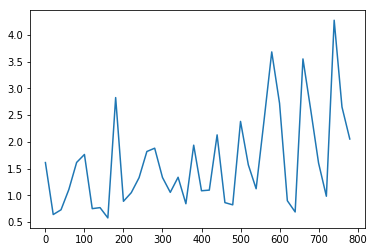

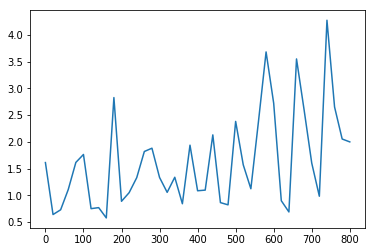

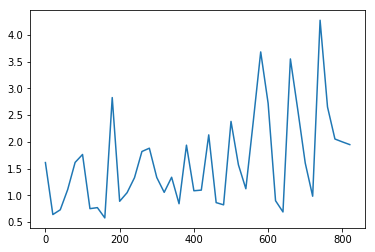

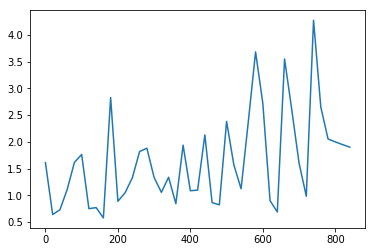

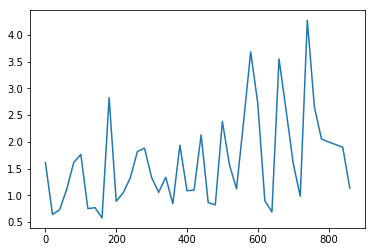

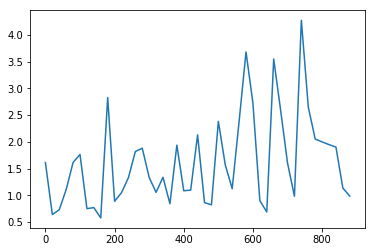

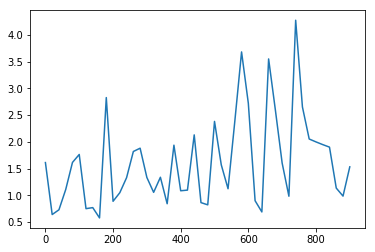

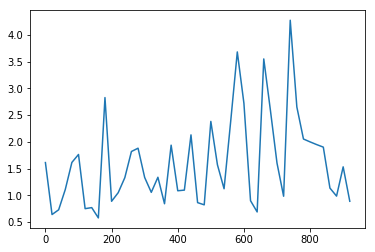

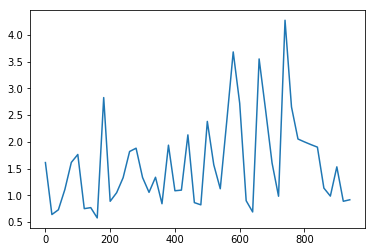

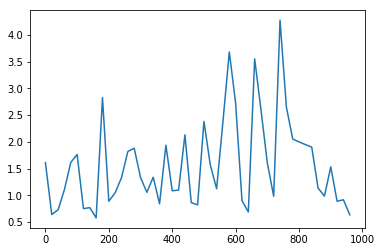

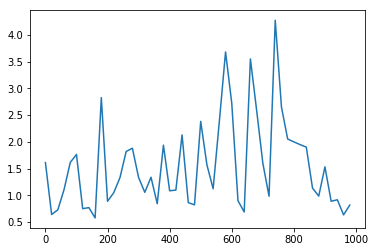

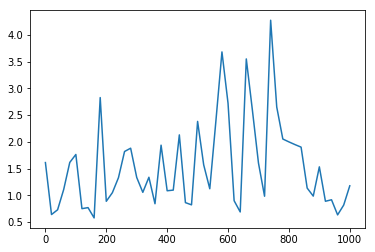

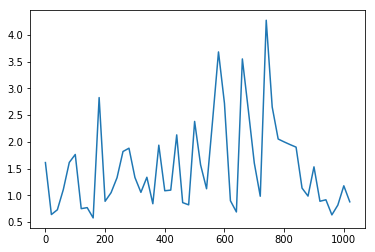

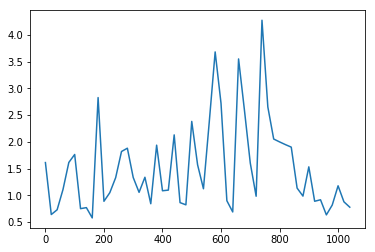

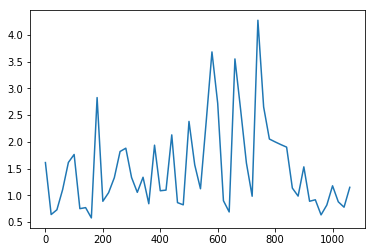

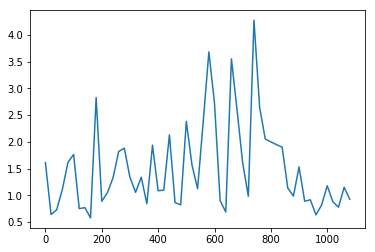

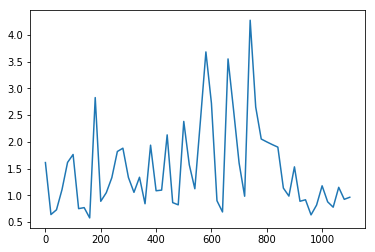

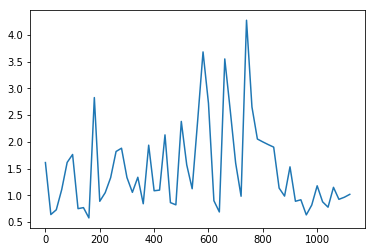

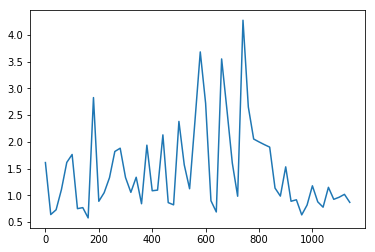

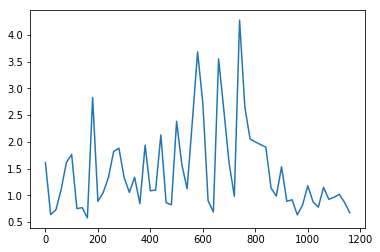

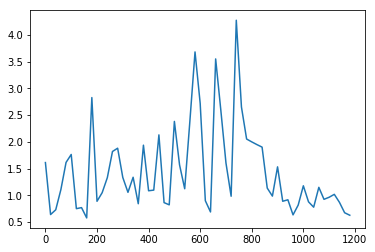

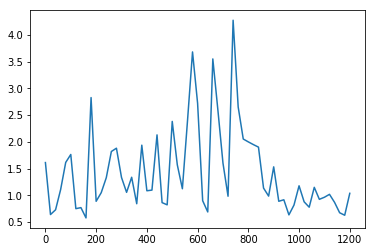

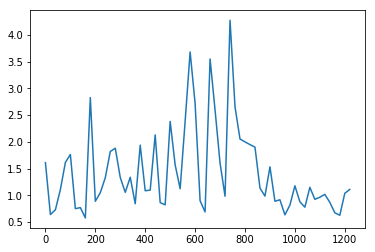

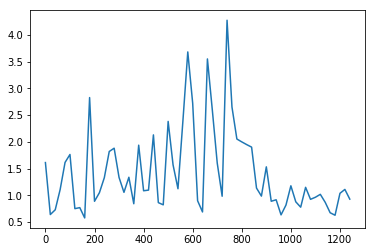

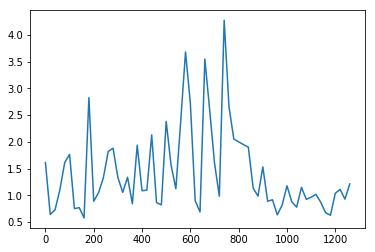

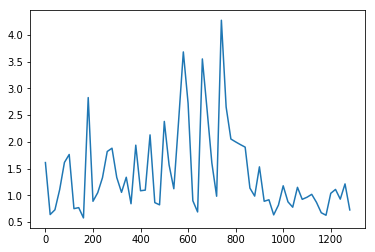

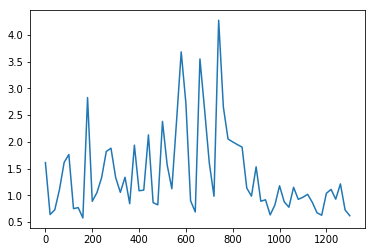

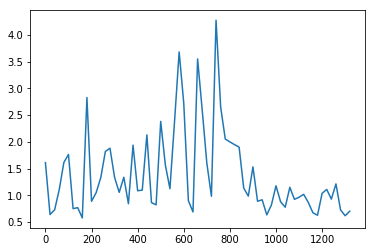

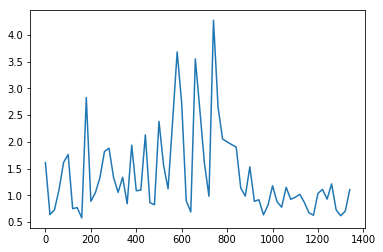

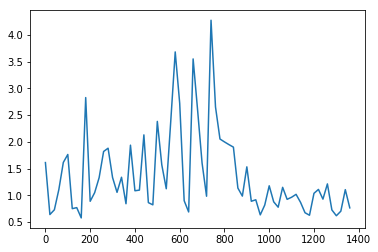

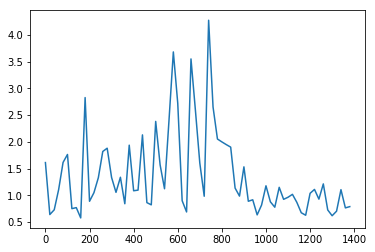

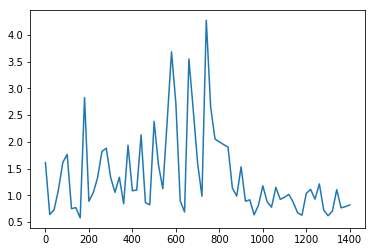

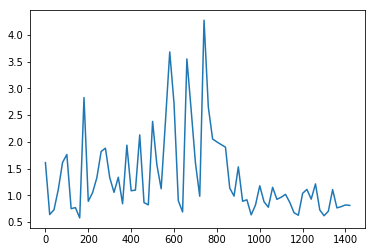

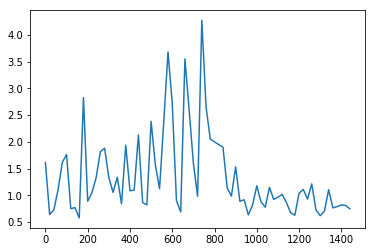

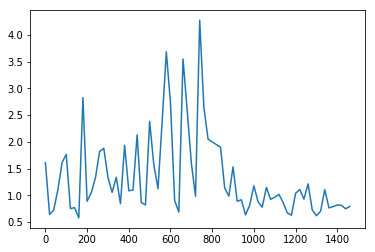

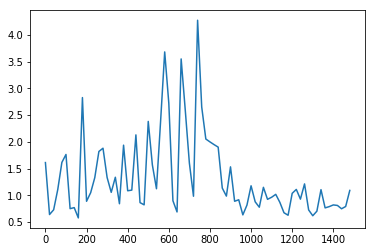

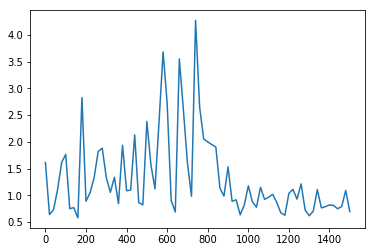

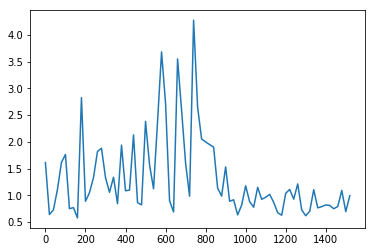

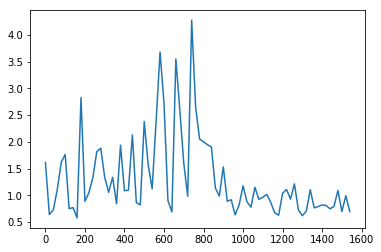

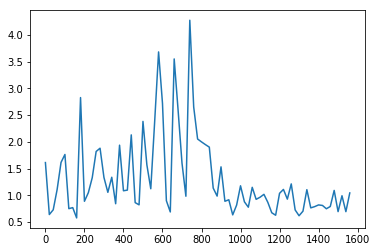

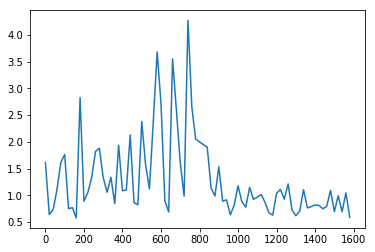

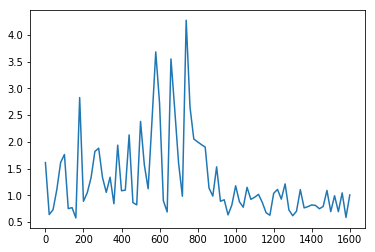

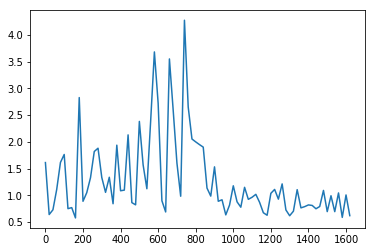

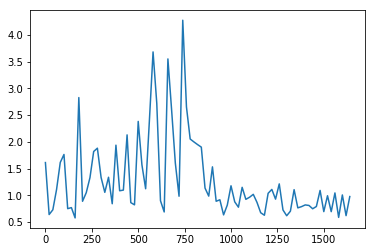

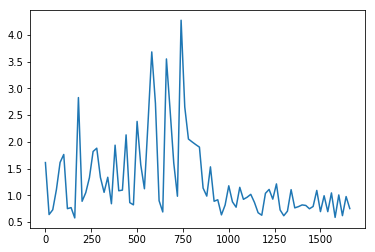

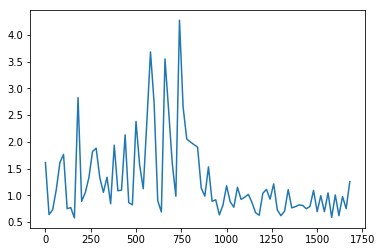

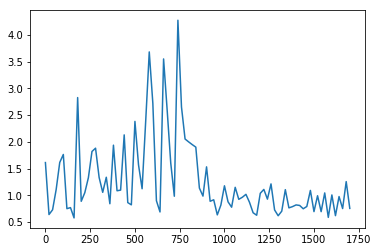

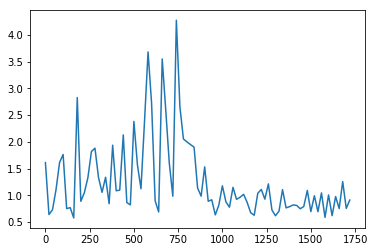

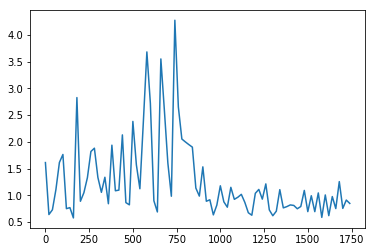

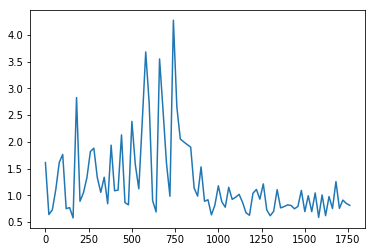

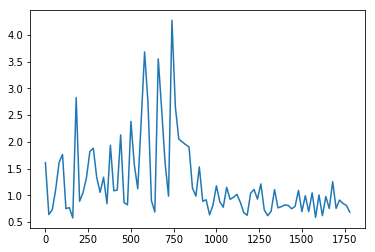

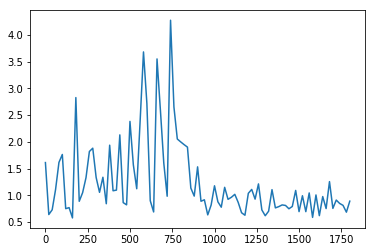

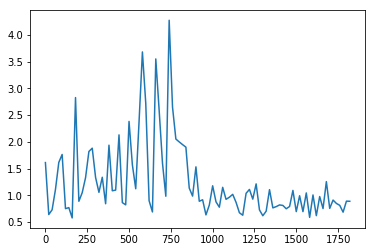

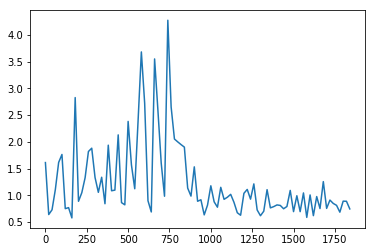

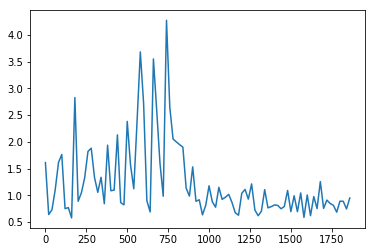

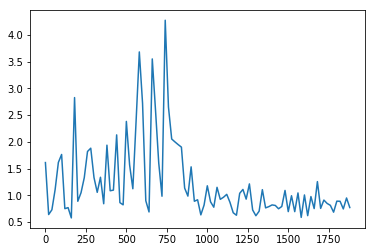

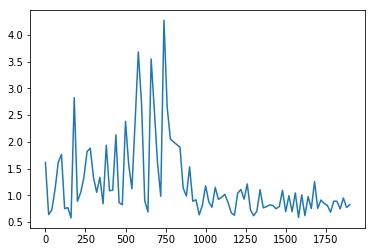

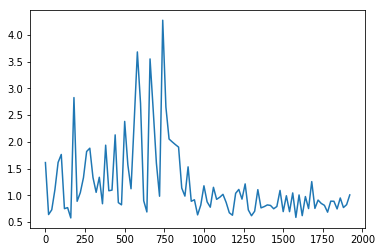

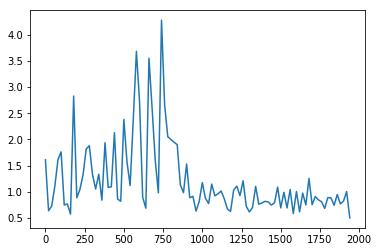

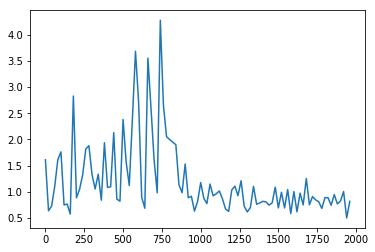

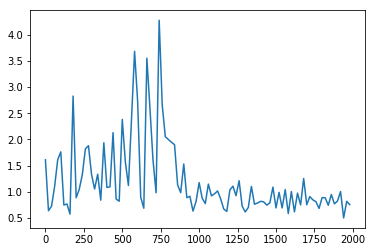

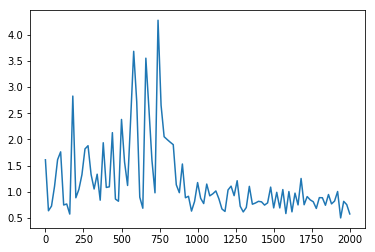

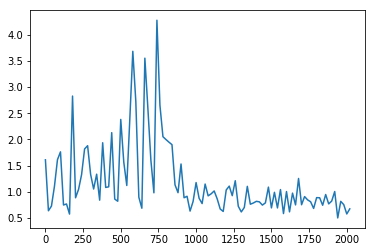

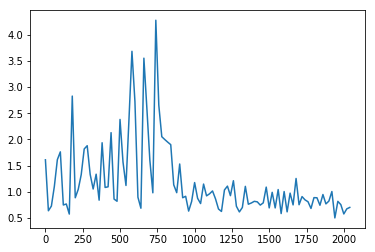

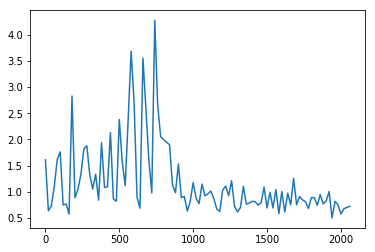

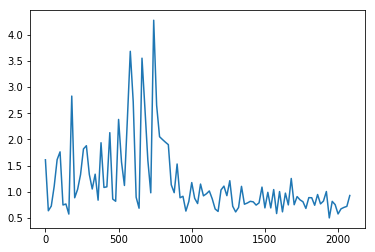

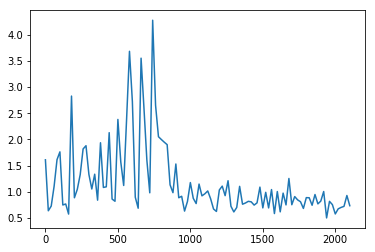

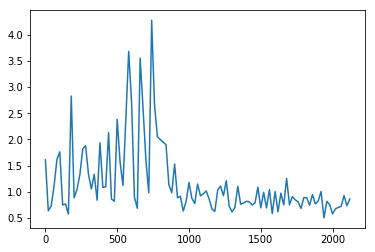

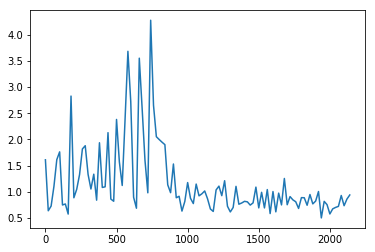

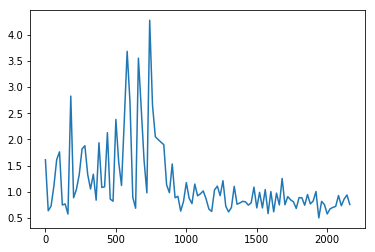

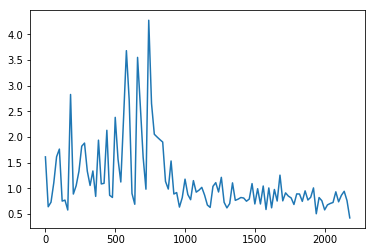

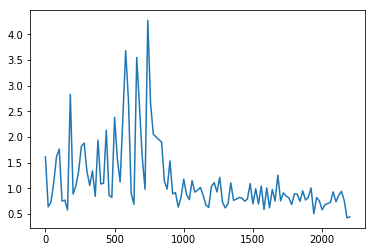

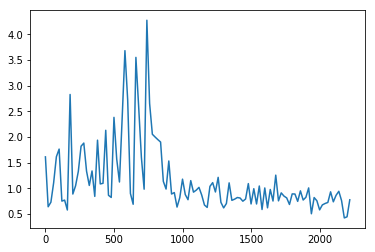

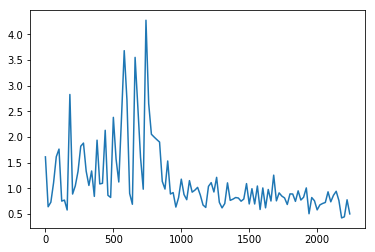

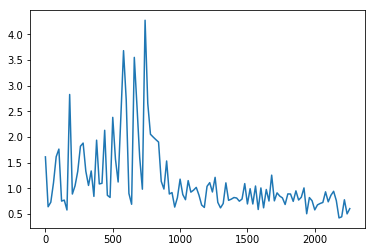

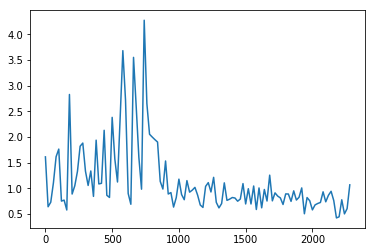

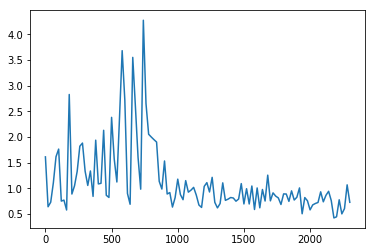

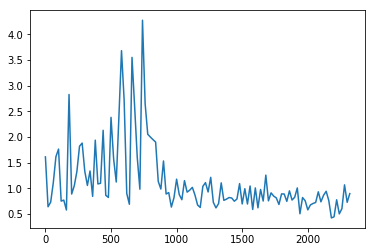

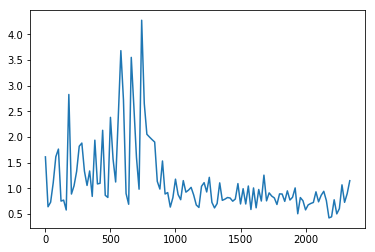

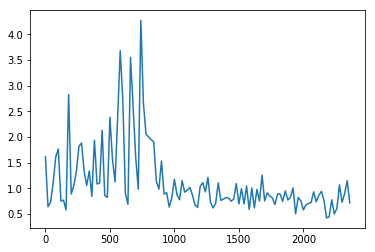

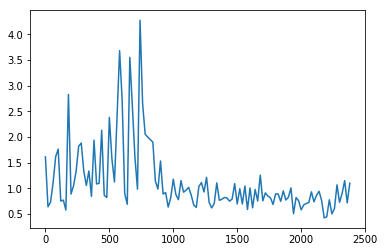

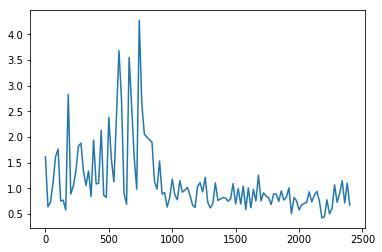

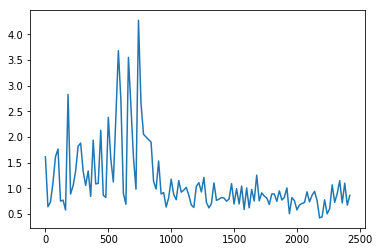

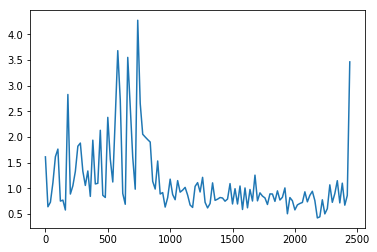

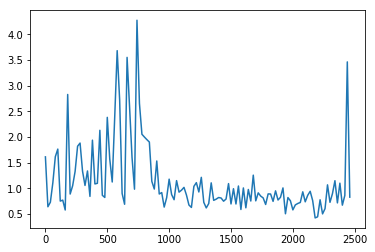

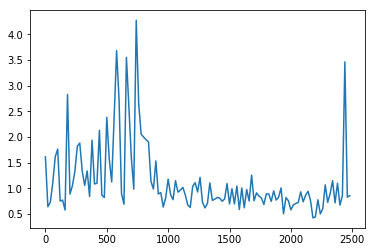

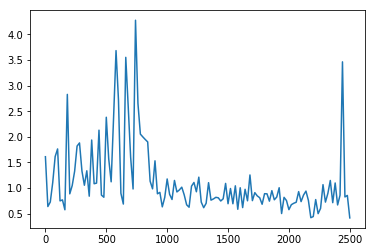

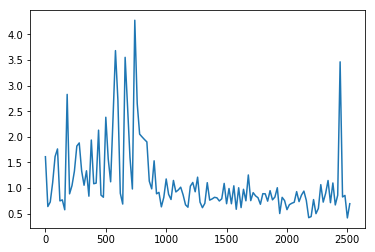

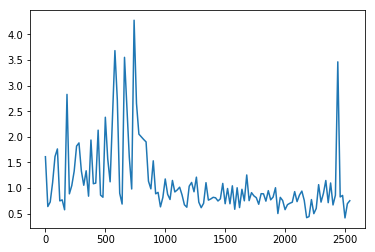

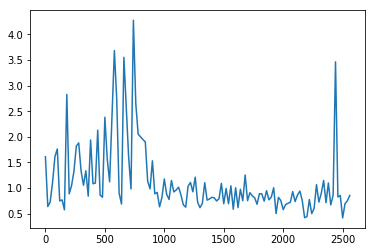

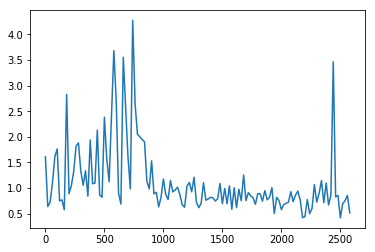

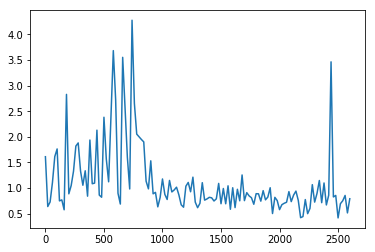

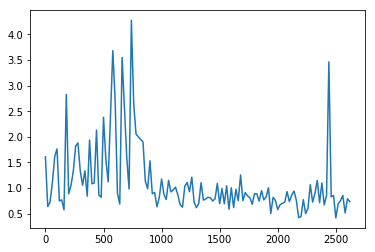

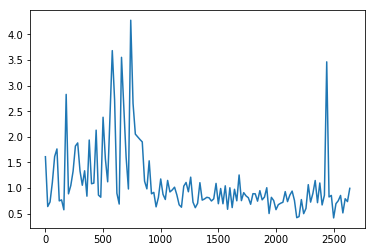

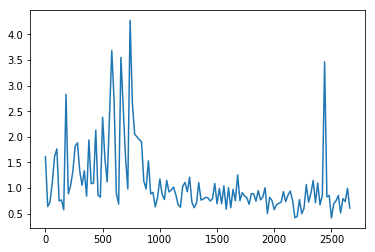

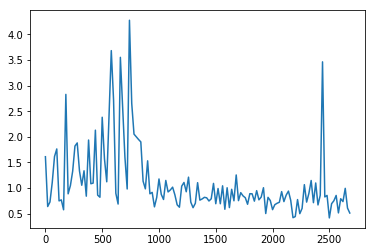

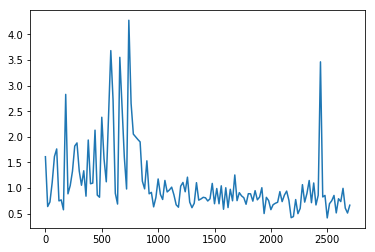

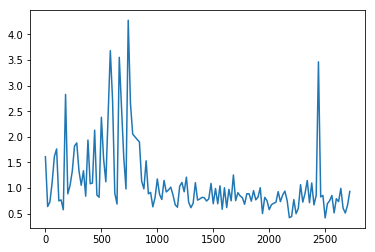

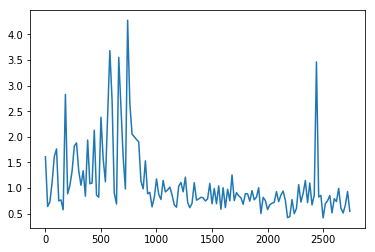

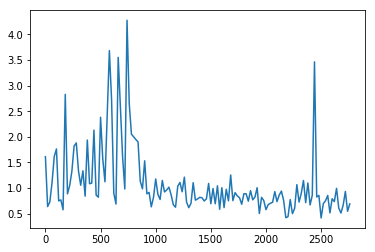

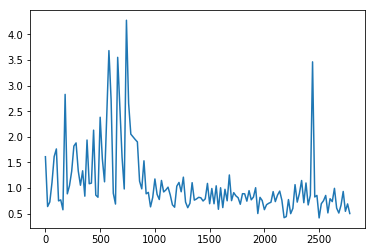

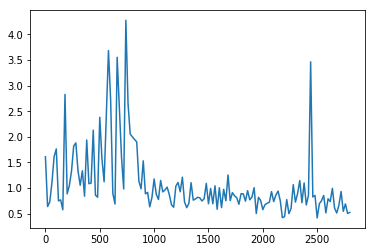

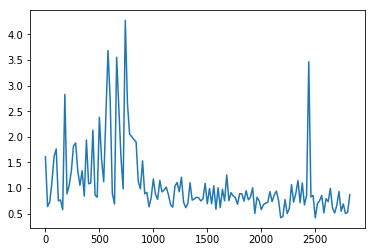

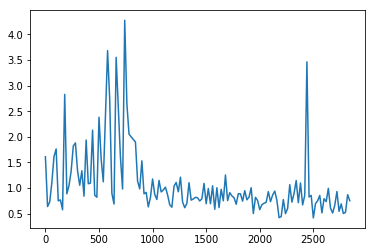

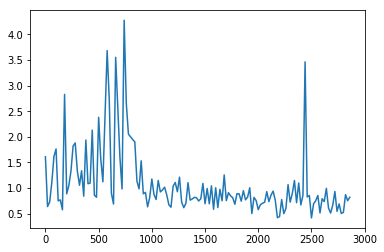

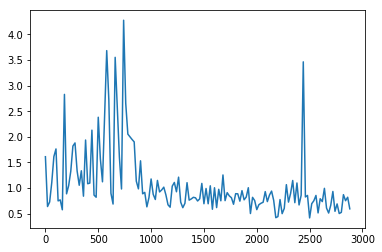

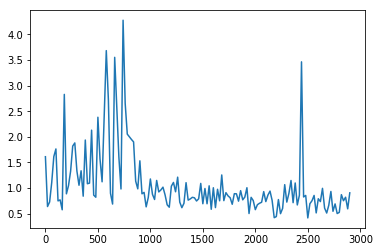

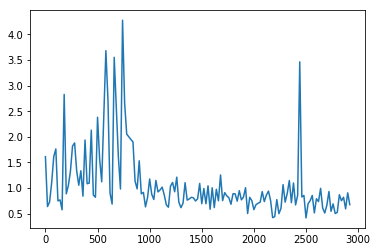

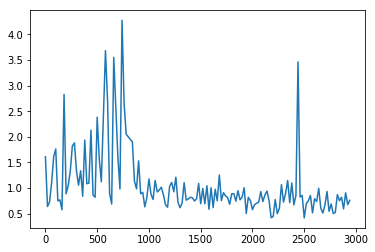

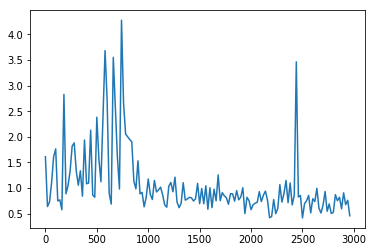

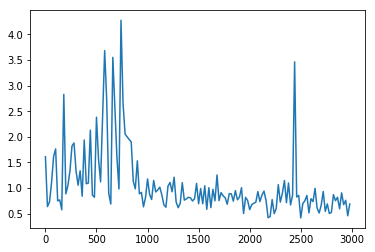

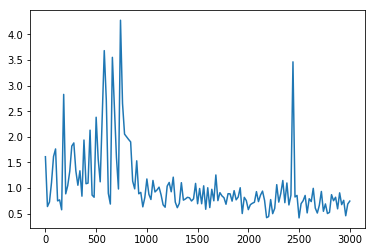

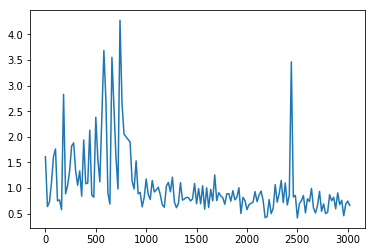

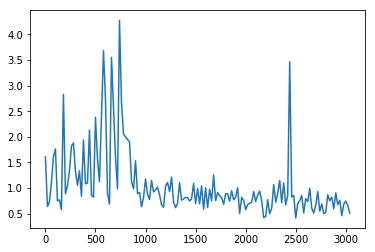

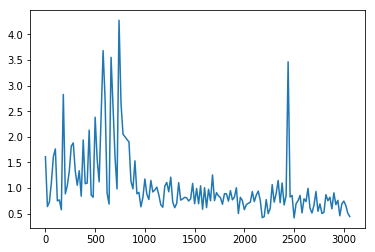

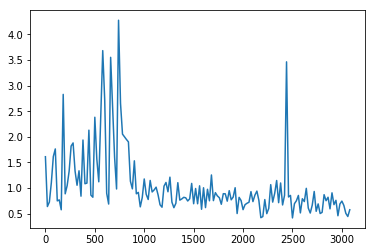

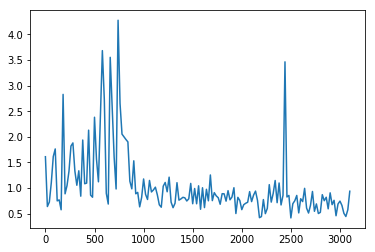

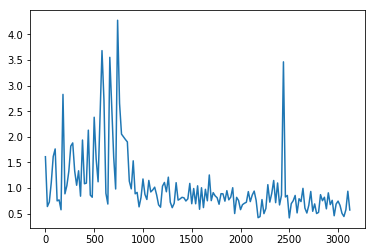

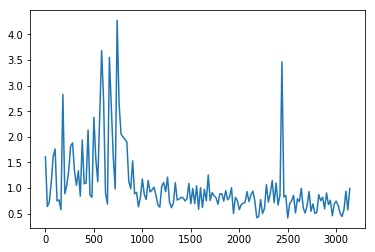

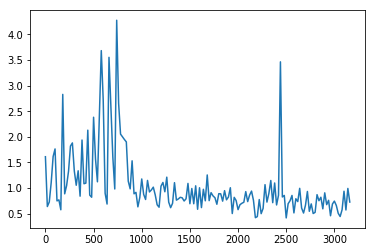

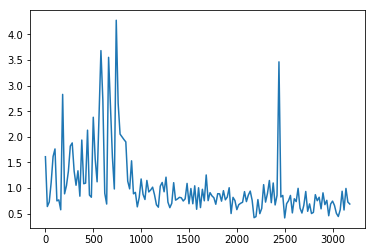

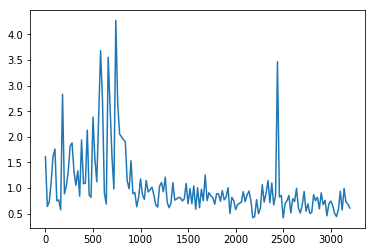

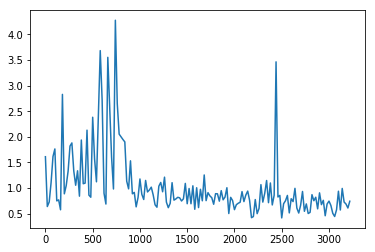

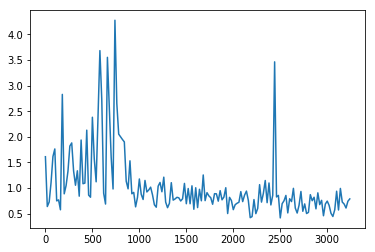

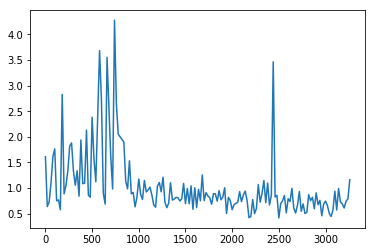

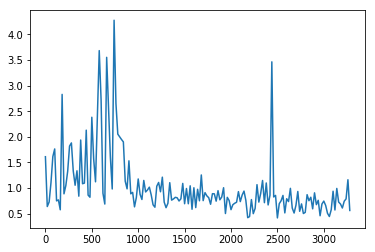

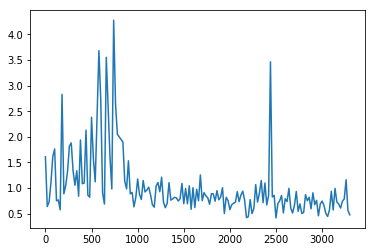

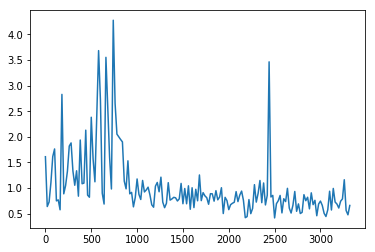

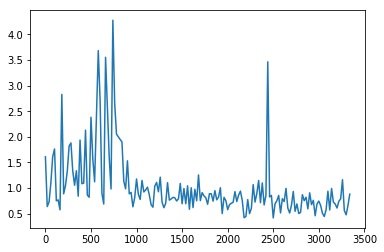

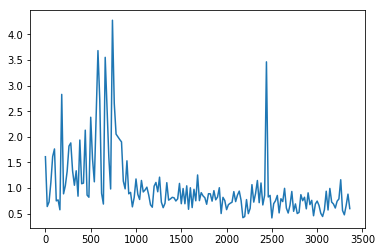

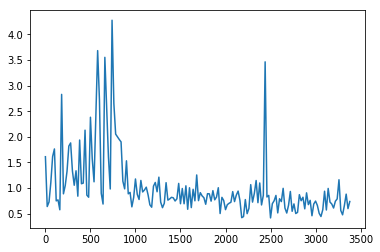

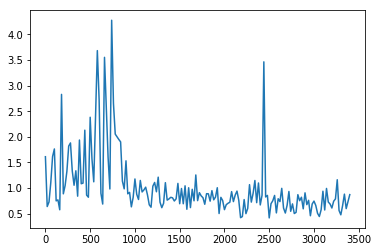

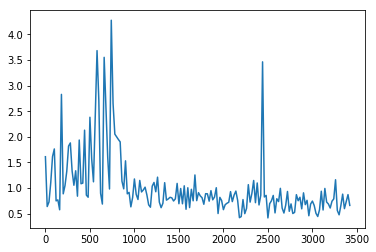

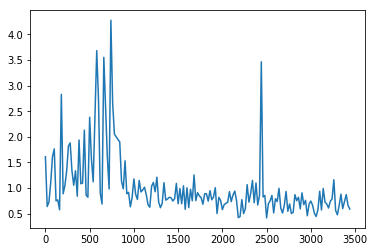

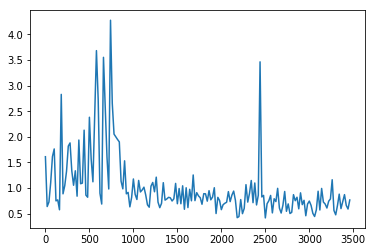

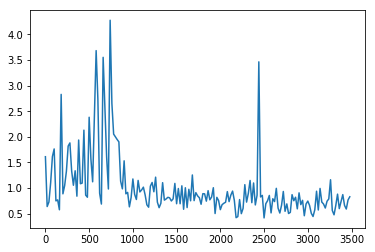

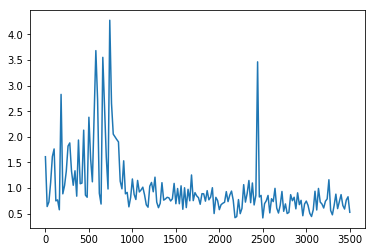

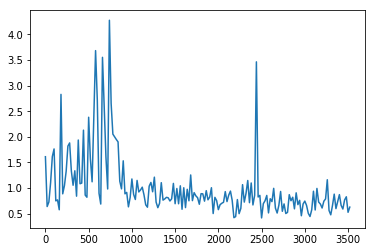

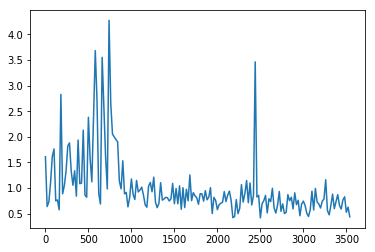

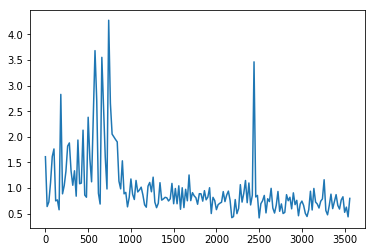

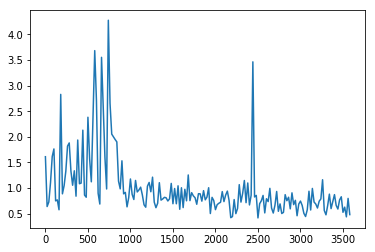

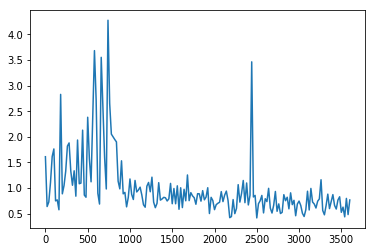

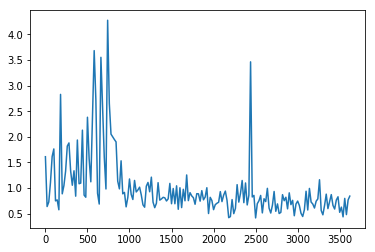

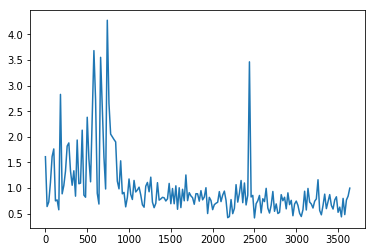

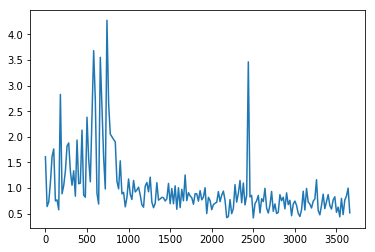

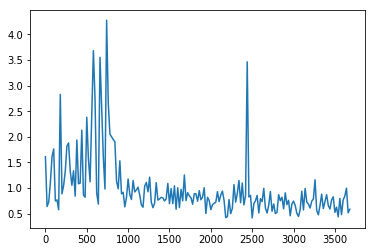

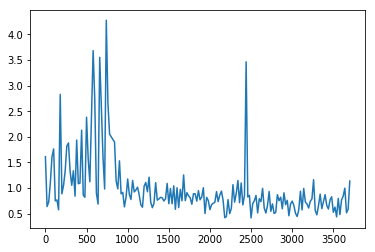

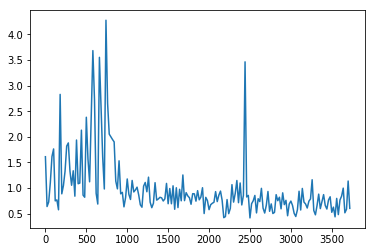

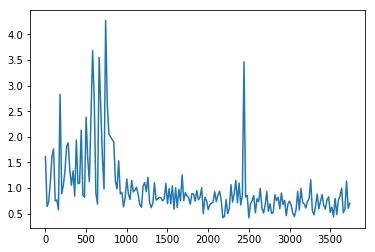

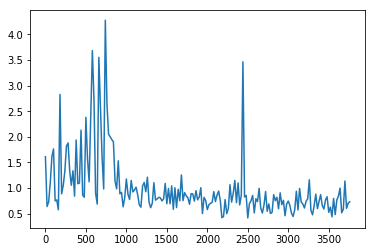

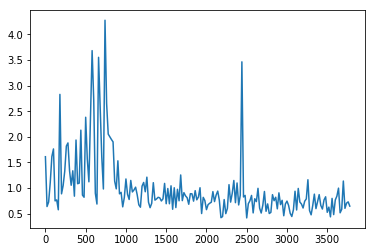

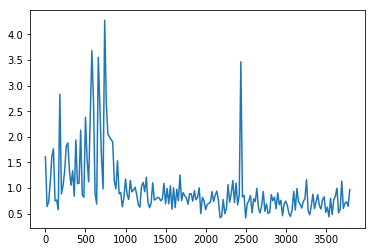

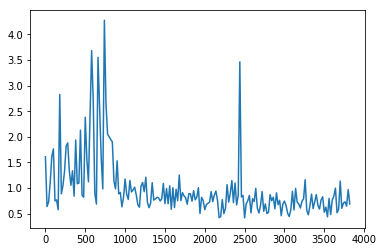

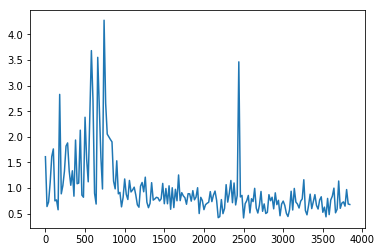

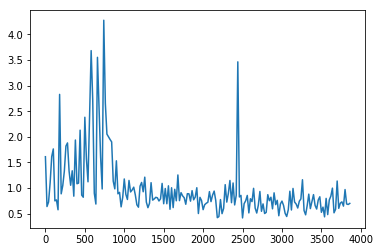

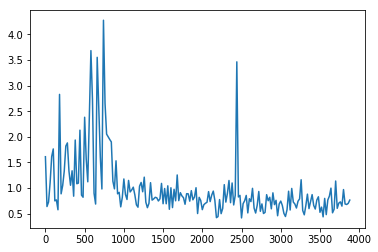

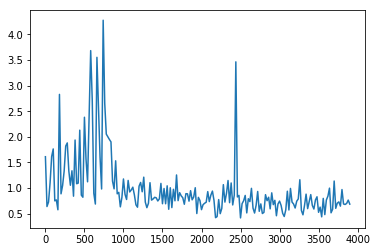

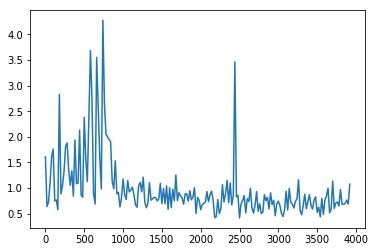

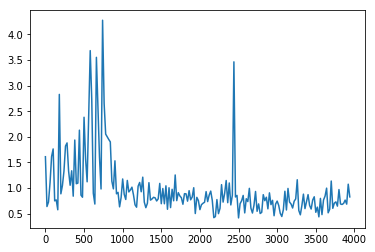

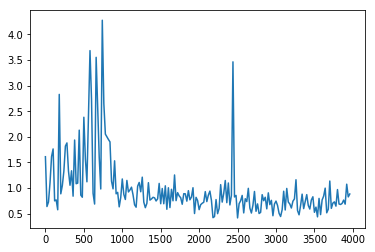

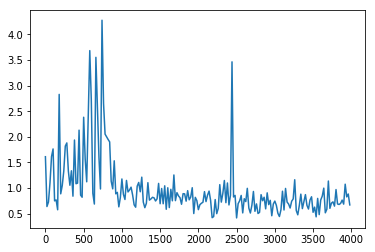

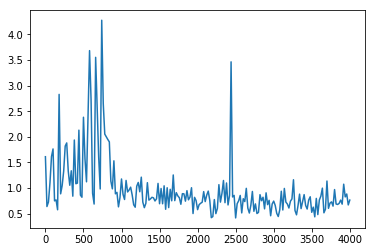

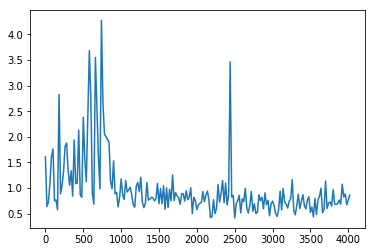

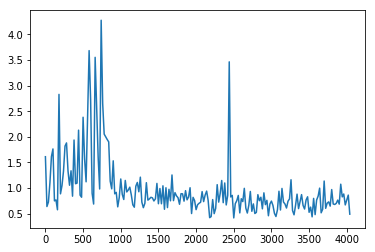

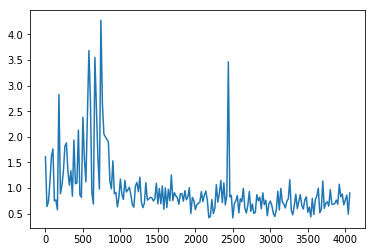

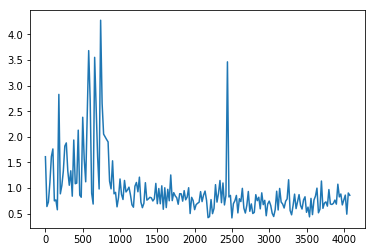

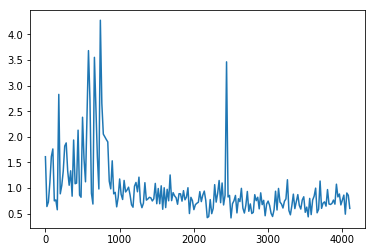

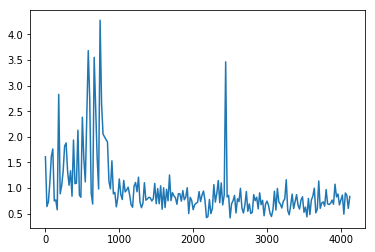

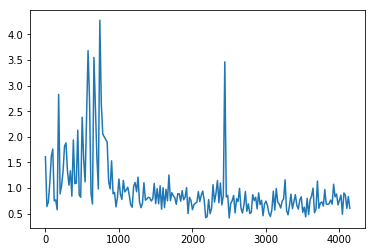

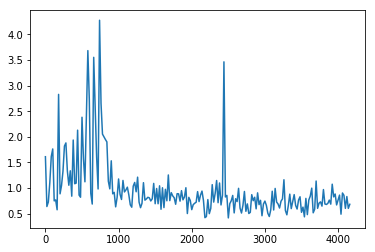

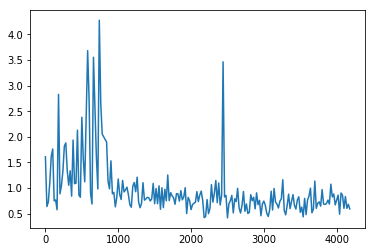

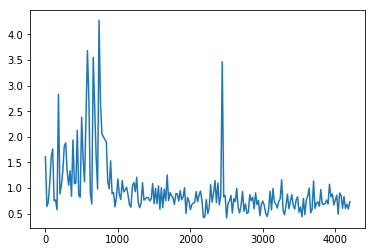

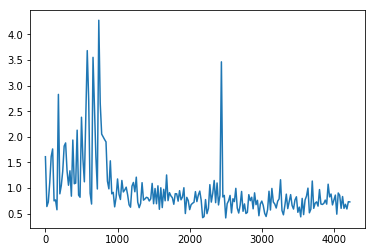

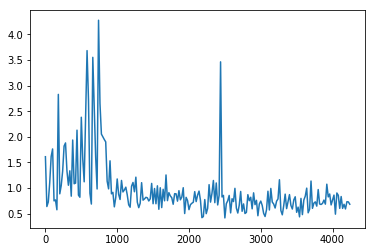

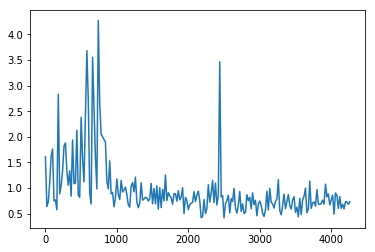

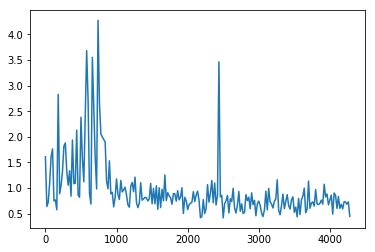

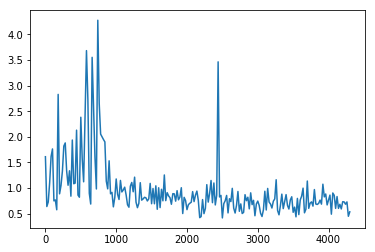

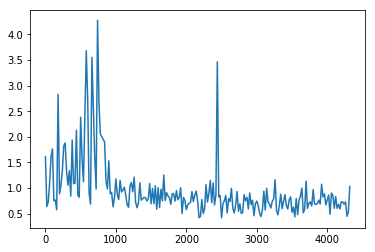

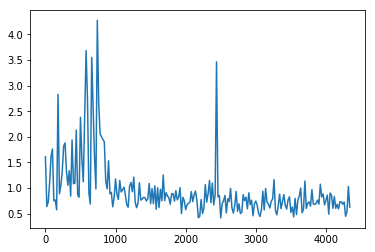

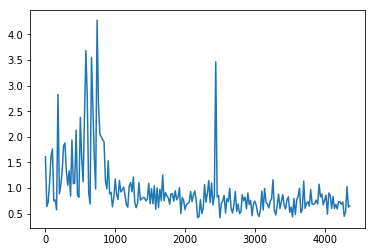

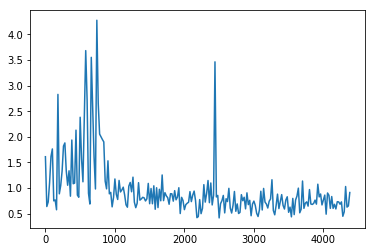

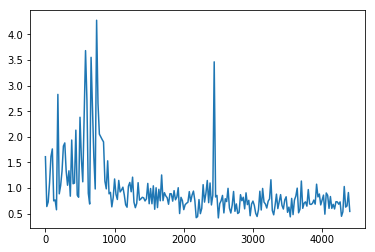

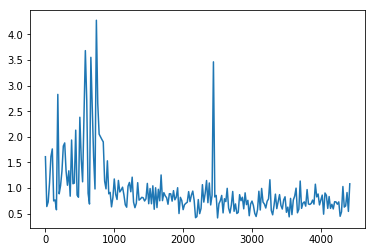

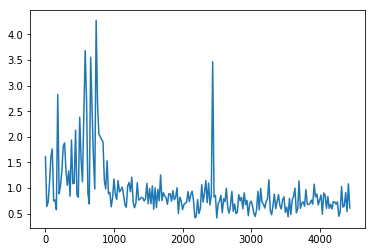

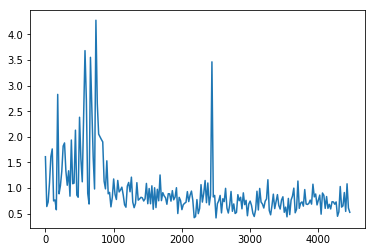

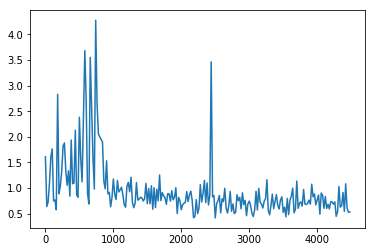

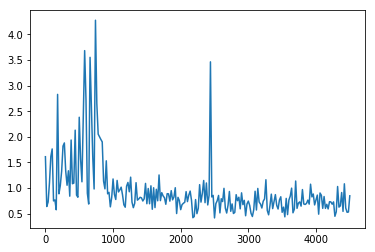

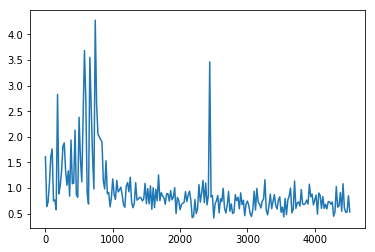

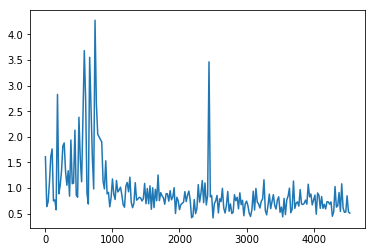

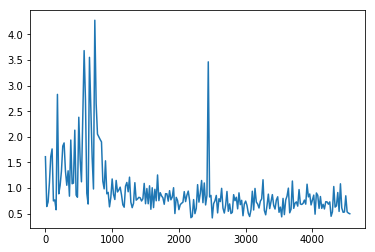

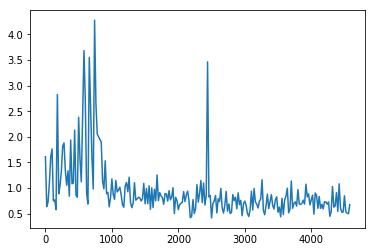

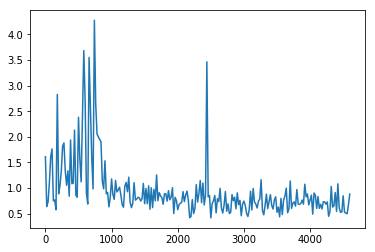

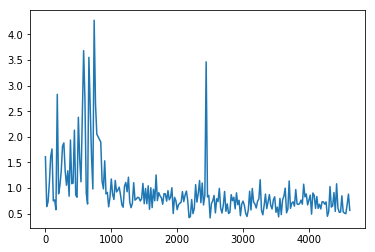

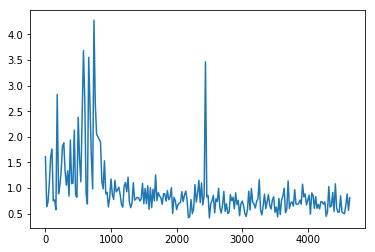

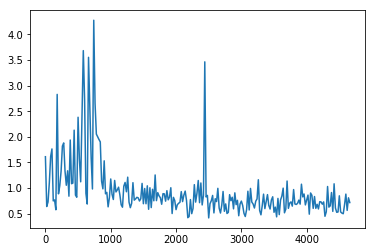

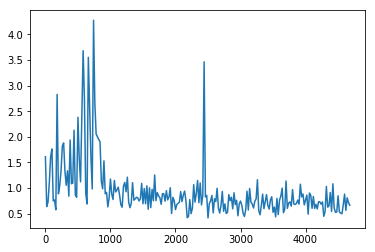

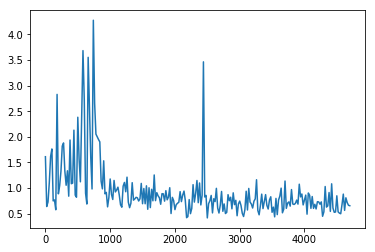

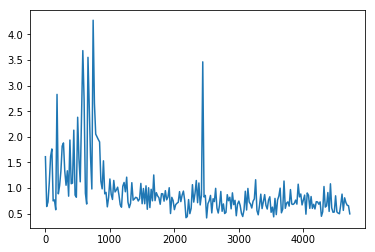

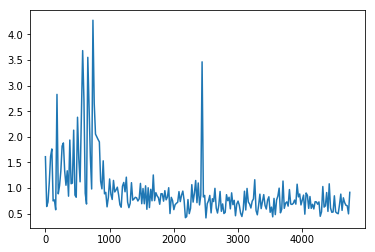

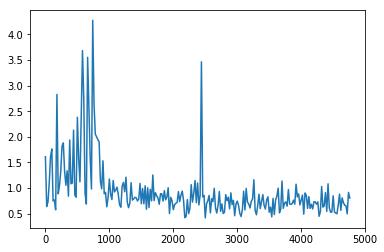

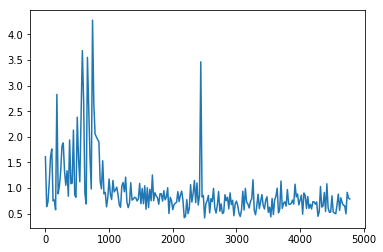

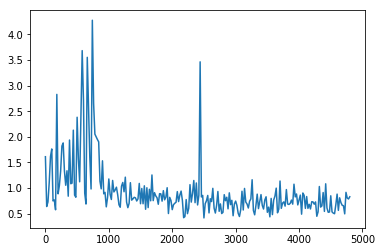

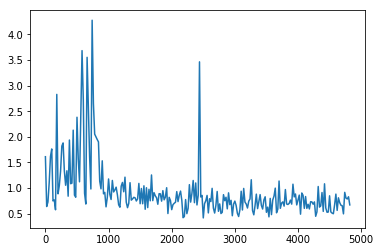

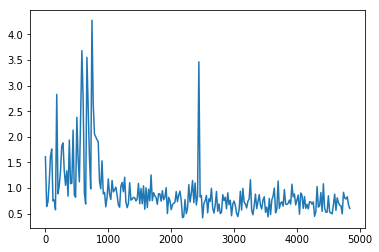

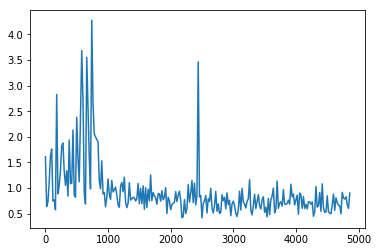

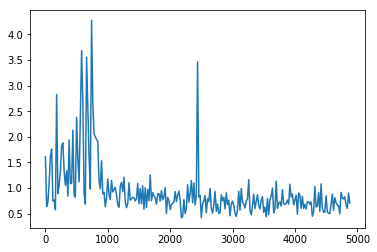

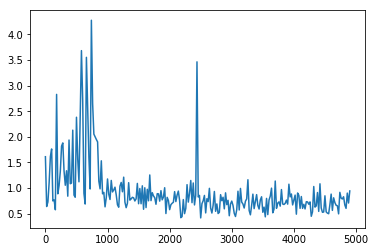

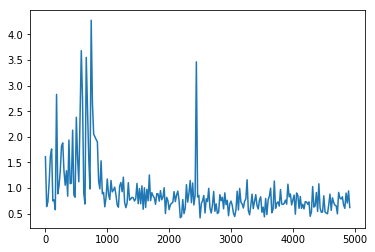

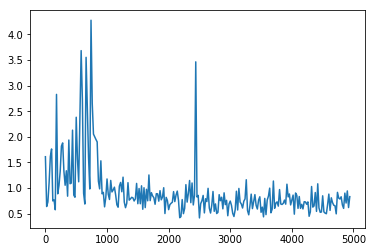

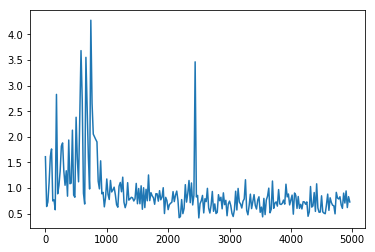

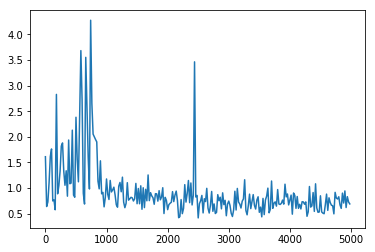

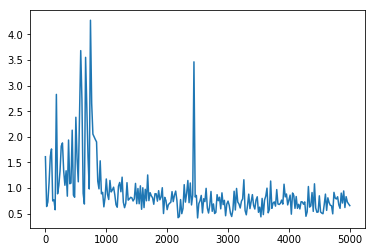

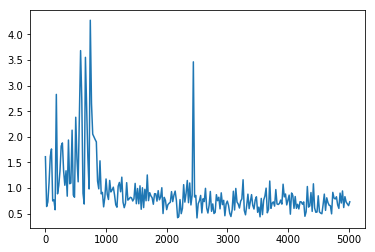

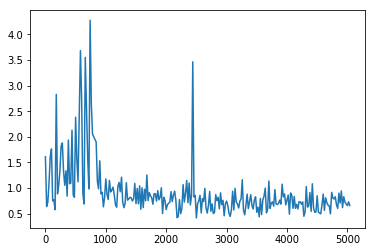

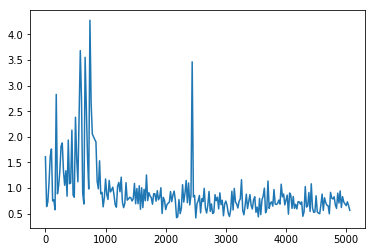

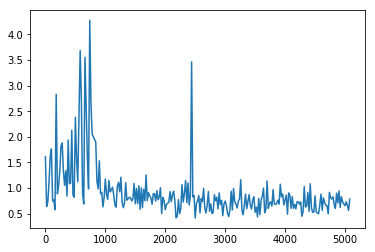

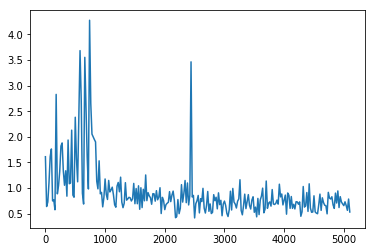

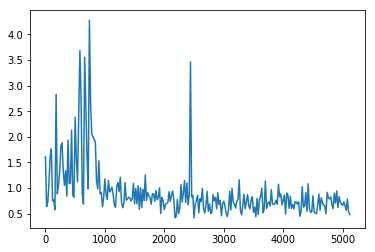

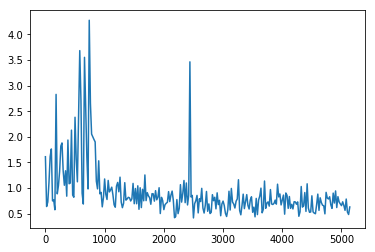

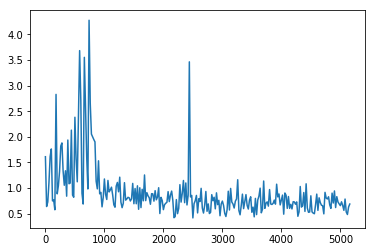

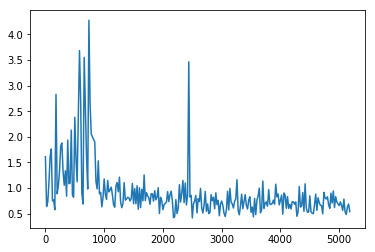

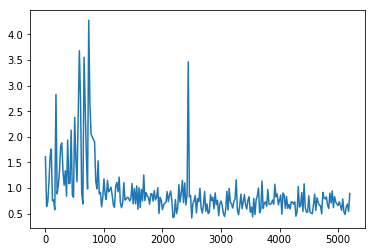

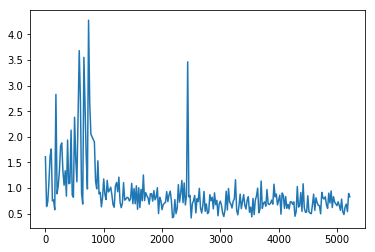

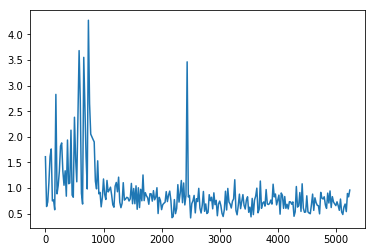

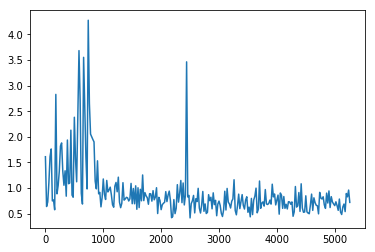

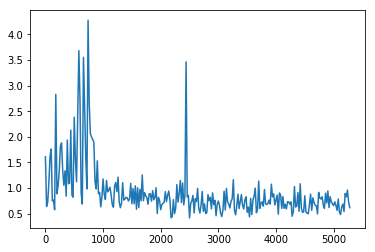

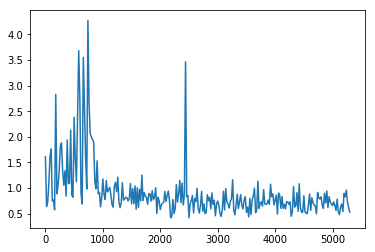

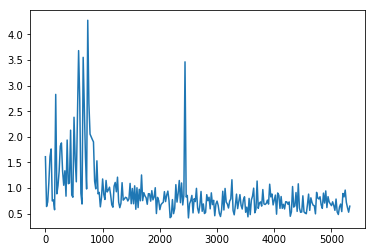

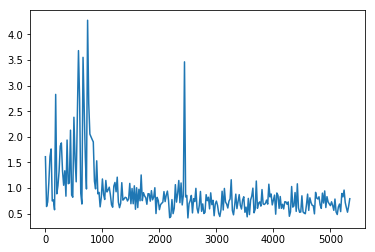

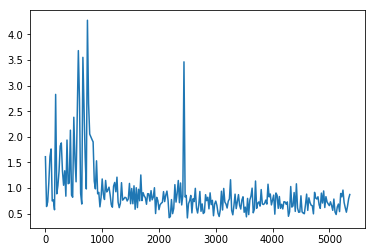

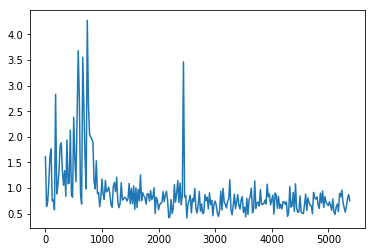

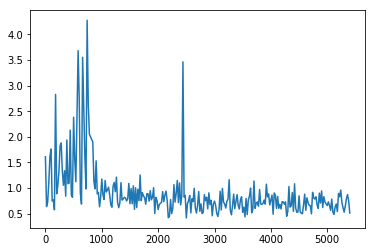

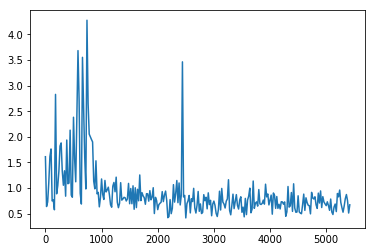

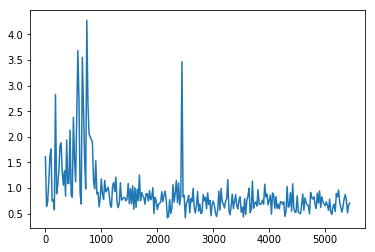

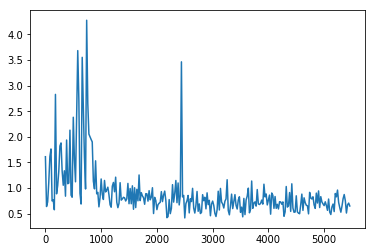

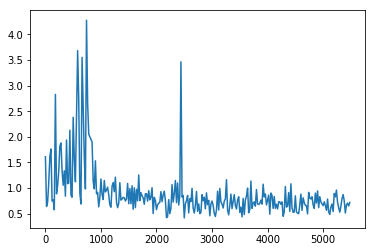

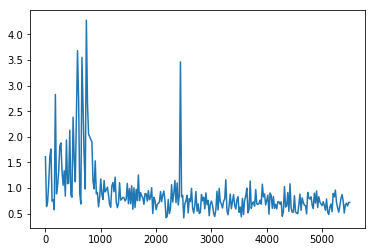

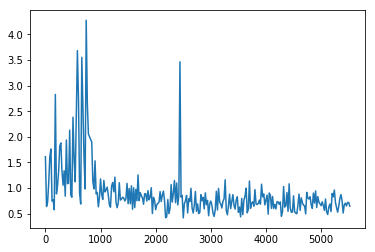

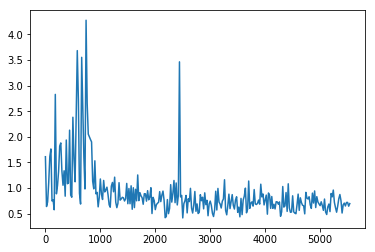

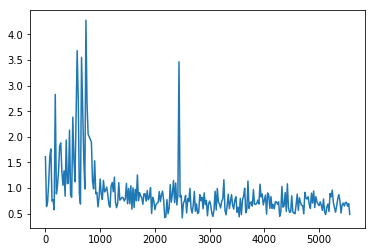

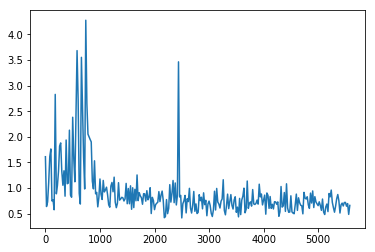

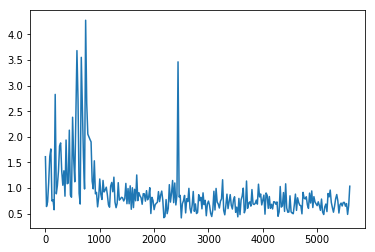

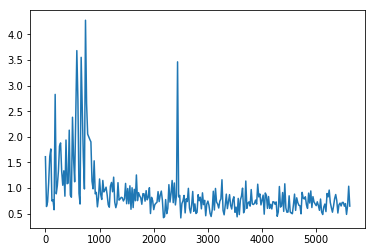

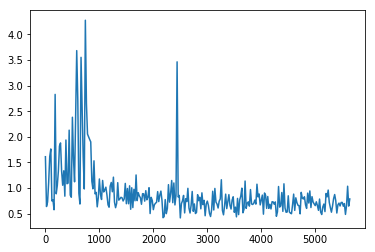

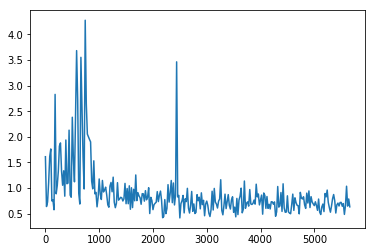

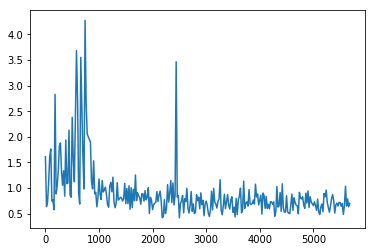

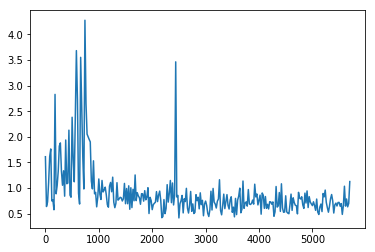

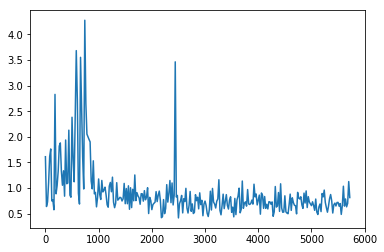

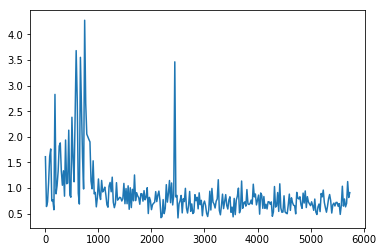

In [13]:
for tmp_epoch in range(EPOCH):
    for data in dataloader:
        img_data, label = data
        
        if CUDA_USAGE:
            input_data = Variable(img_data.cuda())
            label = Variable(label.cuda())
        else:
            pass
        
        optimizer.zero_grad()
        
        outputs = model(input_data)
        loss = loss_function(outputs, label)
        
        loss.backward()
        optimizer.step()
        
        if ITERATION % 20 == 0:
            loss = loss.cpu().detach().numpy()
            LOSS_LIST.append(loss)
            ITERATION_LIST.append(ITERATION)
            
            draw(ITERATION_LIST, LOSS_LIST)
            print("the iteration # is %s, the loss is %s" %(ITERATION, loss))
        
        ITERATION += 1
            
    if tmp_epoch > 35:
        torch.save(model.state_dict(), "./models/" + str(tmp_epoch) + ".pth")
    
    scheduler.step()